# Enterprise Datascience First Project Delivery

Task 1: To plot graphs of relative cases of Covid-19 cases(Normalized) for three given countries(Personal Choice)

Aim is to find out how China was able to manage COVID-19, we can use cues from their covid cases graphs & vaccination rates compared to other countries(Germany & US)


In [98]:
import matplotlib.pyplot as matplt
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
#Using OS package
import os
from os.path import dirname as pDir
from os.path import join as pJoin



pd.set_option('display.max_rows',500)                                     #To set defaults for max_rows when displayed as table
parentDirectoryMain = pDir(pDir(os.path.abspath('__file__')))             

Main Initialization Variables:

In [99]:
country_selected = ['China','US','Italy']

In [100]:
#Population data was unavailable in the main Covid data
#Taking the population data from the below GITHUB reference
pop_csv = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/world_pop_by_country.csv')

#Visual Data Correction
pop_csv.head(15)

,Country Name,Country Code,2018
0,Aruba,ABW,105845.0
1,Afghanistan,AFG,37172386.0
2,Angola,AGO,30809762.0
3,Albania,ALB,2866376.0
4,Andorra,AND,77006.0
5,Arab World,ARB,419790588.0
6,United Arab Emirates,ARE,9630959.0
7,Argentina,ARG,44494502.0
8,Armenia,ARM,2951776.0
9,American Samoa,ASM,55465.0


In [101]:
#drop unwanted columns like Country Code
pop_csv = pop_csv.drop(['Country Code',], axis=1)

#Rename the column for population
pop_csv = pop_csv.rename(columns = {'2018' : 'Population'}) 

#Setting the primary key pf the table as Country name
pop_csv = pop_csv.set_index(['Country Name']).T

In [102]:
#Main COVID-Data retrieval

csv_main_directory  = pJoin(parentDirectoryMain,"data","raw","COVID-19","csse_covid_19_data","csse_covid_19_time_series","time_series_covid19_confirmed_global.csv")
covid_cases_all =  pd.read_csv(csv_main_directory)

In [103]:
covid_cases_all.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181534,181574,181666,181725,181808,181912,181987,182033,182072,182149
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,277141,277141,277409,277444,277663,277940,278211,278504,278793,279077
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265968,265971,265975,265985,265993,266006,266015,266025,266030,266038
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43774,43774,43774,43774,43774
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,8555,8581,8581,8581,8581,8590,8590,8625,8625,8625
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9313453,9313453,9341492,9341492,9341492,9341492,9341492,9341492,9341492,9367172
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,423044,423044,423044,423104,423104,423104,423104,423104,423104,423104
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,145457,146264,147096,147942,148996,150123,151113,152199,153012,153939


Data Preparation:

In [104]:
#Data Preparation/Reformatting
covid_cases_corrected = covid_cases_all.rename(columns = {'Country/Region' : 'country','Province/State':'state'})
covid_cases_corrected['state'] = covid_cases_corrected['state'].fillna('no')
covid_cases_corrected = covid_cases_corrected.drop(['Lat','Long'], axis=1)

In [105]:
covid_cases_corrected.head(10)

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,181534,181574,181666,181725,181808,181912,181987,182033,182072,182149
1,no,Albania,0,0,0,0,0,0,0,0,...,277141,277141,277409,277444,277663,277940,278211,278504,278793,279077
2,no,Algeria,0,0,0,0,0,0,0,0,...,265968,265971,265975,265985,265993,266006,266015,266025,266030,266038
3,no,Andorra,0,0,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43774,43774,43774,43774,43774
4,no,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761
5,no,Antarctica,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,no,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,8555,8581,8581,8581,8581,8590,8590,8625,8625,8625
7,no,Argentina,0,0,0,0,0,0,0,0,...,9313453,9313453,9341492,9341492,9341492,9341492,9341492,9341492,9341492,9367172
8,no,Armenia,0,0,0,0,0,0,0,0,...,423044,423044,423044,423104,423104,423104,423104,423104,423104,423104
9,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,145457,146264,147096,147942,148996,150123,151113,152199,153012,153939


Dataframe Creation:

In [106]:
time_idx = covid_cases_corrected.columns[2: ]

df_plot = pd.DataFrame({'date':time_idx})

df_plot.head(15)

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
5,1/27/20
6,1/28/20
7,1/29/20
8,1/30/20
9,1/31/20


In [107]:
#Creating separate Columns for normalization

for each in country_selected:
    df_plot[each] = np.array(covid_cases_corrected[covid_cases_corrected['country']==each].iloc[:,2::].sum(axis=0))

In [108]:
df_plot.head(20)

,date,China,US,Italy
0,1/22/20,548,1,0
1,1/23/20,643,1,0
2,1/24/20,920,2,0
3,1/25/20,1406,2,0
4,1/26/20,2075,5,0
5,1/27/20,2877,5,0
6,1/28/20,5509,5,0
7,1/29/20,6087,6,0
8,1/30/20,8141,6,0
9,1/31/20,9802,8,2


Final_plotting of graph for three Countries Selected:

<AxesSubplot:title={'center':'No. of case per Population vs date'}, xlabel='Date', ylabel='Covid Cases(Normalized)'>

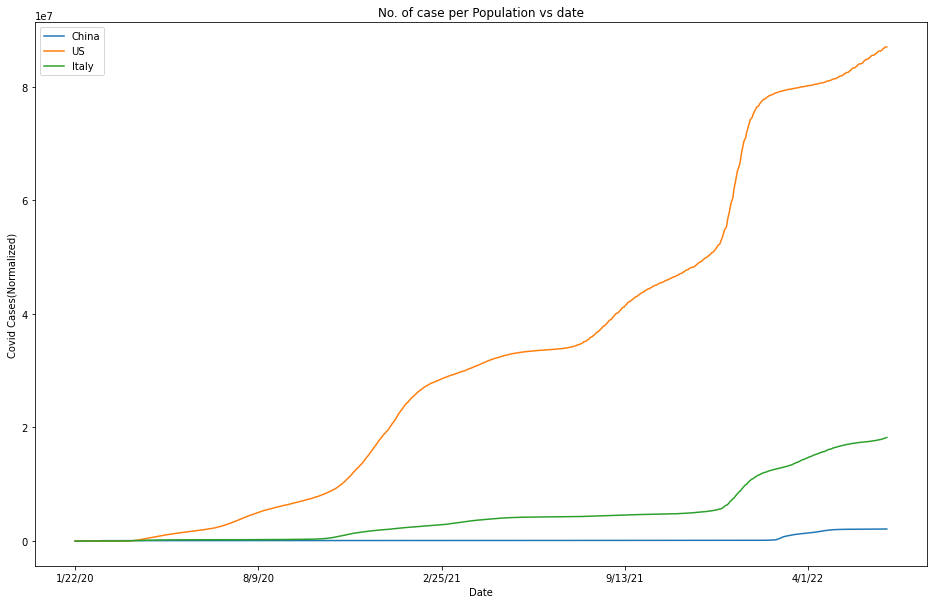

In [109]:

df_plot.set_index('date').plot(title="No. of case per Population vs date",ylabel= "Covid Cases(Normalized)",xlabel = "Date",figsize=(16,10))

# Task 2: To plot graphs of vaccination rates for the three countries selected

In [110]:
#Similar approach as above but vaccination data available in different github directory.

In [118]:
vaccineDatapath = 'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv'

#Retrieve Vaccine data
pd_vaccine_data = pd.read_csv(vaccineDatapath, usecols = ['Date','Country_Region','People_fully_vaccinated'],parse_dates=['Date'])

In [119]:
pd_vaccine_data = pd_vaccine_data[pd_vaccine_data['Country_Region'].isin(country_selected)]

In [120]:
pd_vaccine_data.head(20)

,Country_Region,Date,People_fully_vaccinated
3,China,2020-12-15,0.0
7,China,2020-12-16,0.0
11,China,2020-12-17,0.0
15,China,2020-12-18,0.0
19,China,2020-12-19,0.0
24,China,2020-12-20,0.0
27,US,2020-12-20,0.0
30,China,2020-12-21,0.0
33,US,2020-12-21,0.0
36,China,2020-12-22,0.0


In [121]:


pd_vaccine_data = pd.pivot_table(
    data= pd_vaccine_data,                                    
    index='Date',                                                 
    columns='Country_Region',                                   
    values='People_fully_vaccinated',                          
                             
    )

pd_vaccine_data = pd_vaccine_data.fillna(0)                                         #Correcting NAN values

In [122]:
for each in country_selected:
    pd_vaccine_data[each] = np.array(pd_vaccine_data[each]/float(pop_csv[each])*100)

In [124]:
pd_vaccine_data

Country_Region,China,Italy,US
Date,,,
2020-12-15,0.000000,0.000000,0.000000
2020-12-16,0.000000,0.000000,0.000000
2020-12-17,0.000000,0.000000,0.000000
2020-12-18,0.000000,0.000000,0.000000
2020-12-19,0.000000,0.000000,0.000000
...,...,...,...
2022-06-26,90.468863,79.341178,67.892828
2022-06-27,90.468863,79.342024,67.892828
2022-06-28,90.505769,79.342931,67.892828


<AxesSubplot:title={'center':'Vaccination Rate per % of Population'}, xlabel='Date', ylabel='Percentage of Fully_vaccinated_people for three countries'>

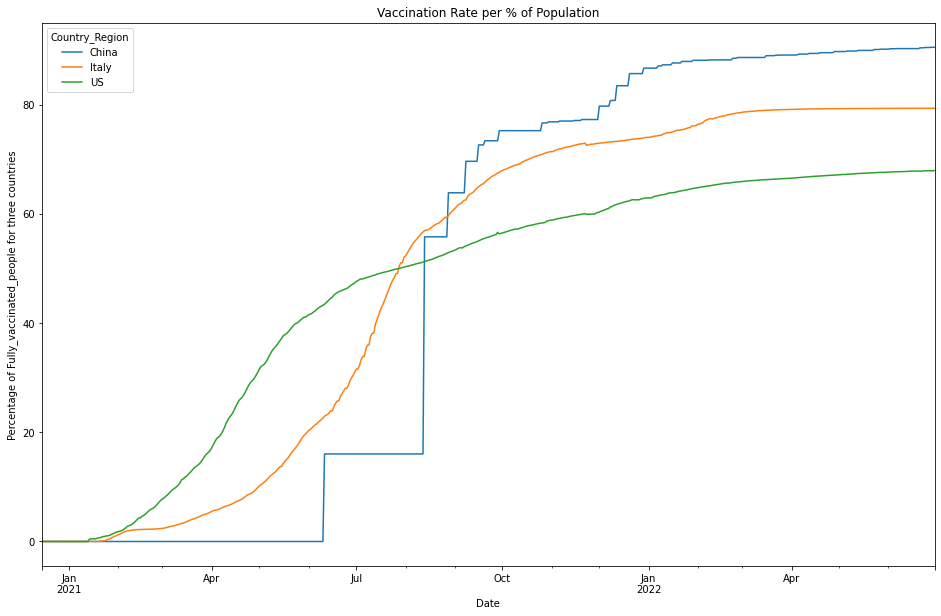

In [125]:
pd_vaccine_data.plot(title="Vaccination Rate per % of Population",ylabel= "Percentage of Fully_vaccinated_people for three countries",xlabel = "Date",figsize=(16,10))